In [1]:
import numpy as np
from time import perf_counter
import matplotlib.pyplot as plt

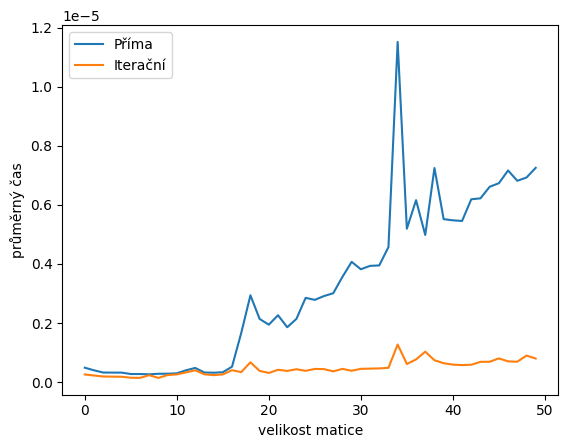

In [21]:
# průměrné časy
time_A = []
time_B = []

# matice od velikosti 1 - 50
for i in range(50):

    # 50 pokusů pro průměr
    for _ in range(50):
        prumerA = 0
        prumerB = 0

        # přímá metoda (LU dekompozice)
        # random matice a vektor dané velikosti
        A = np.random.randint(1, 30, size=(i+1, i+1))
        b = np.random.randint(1, 100, size = i+1)
        # násobení hlavní diagonály kvůli postačující podmínce Jacobiho iterační metody
        A = A + 1000*np.eye(i+1)
        # samotný výpočet
        start_A = perf_counter()
        x = np.linalg.solve(A, b)
        end_A = perf_counter()
        prumerA += end_A - start_A

        
        # Jacobiho iterační metoda
        y = np.ones(len(A))
        D = np.diag(A)
        R = A - np.diagflat(D)
        start_B = perf_counter()
        while abs(x[0] - y[0]) > 0.1:
            y = (b - np.matmul(R,y))/D
        end_B = perf_counter()
        prumerB += end_B - start_B

    # přidám do časů průměry výpočtů
    time_A.append(prumerA/50)
    time_B.append(prumerB/50)


# vykreslení grafů závislosti času na velikosti matice
plt.plot(time_A, label = 'Příma')
plt.plot(time_B, label = 'Iterační')
plt.legend(loc = 'upper left')
plt.xlabel('velikost matice')
plt.ylabel('průměrný čas')
plt.show()